In [1]:
#import packages 
import pyspark
from os import listdir
from os.path import isfile, join
import boto3
import pandas as pd
from sagemaker import get_execution_role
from pyspark.sql.types import LongType, StringType, StructField, StructType, BooleanType, ArrayType, IntegerType

In [2]:
#Initialzie 
conf = pyspark.SparkConf().setAppName('odl').setMaster('local')
sc = pyspark.SparkContext(conf=conf)
sqlc = pyspark.sql.SQLContext(sc)
sc

<SparkContext master=local appName=odl>

In [3]:
sqlc


In [4]:
#Read into spark dataframe from csv in s3
role = get_execution_role()
bucket='odl-spark19spds6003-001'
data_key = 'nh4mq/crash_test_afterdummy.csv'
data_location = 's3://{}/{}'.format(bucket, data_key)


In [5]:
pd.read_csv(data_location).head()

,Unnamed: 0,Latitude,Longitude,VehicleYear,VehicleSpeedBeforeCrash,VehicleSpeedLimit,VehicleMaximumSafeSpeed,AgeAtCrash,CountOffense,Week,...,DriverDrinkingID_NoDrinking,DriverDrinkingID_Drinking,DriversActionID_Unknown,DriversActionID_NoImproperAction,TypeOfDriverDistractionID_Unknown,TypeOfDriverDistractionID_NoDistraction,DriverDrugUseID_2.0,DriverDrugUseID_3.0,DriverDrugUseID_4.0,DriverSeatbeltUsage
0,0,36.84859,-76.20993,2004,10.0,30.0,30.0,21.0,0,4,...,1,0,0,0,1,0,0,1,0,0.0
1,1,38.67771,-77.23463,2012,0.0,55.0,0.0,19.0,0,11,...,1,0,0,1,0,1,0,1,0,0.0
2,2,36.78789,-76.42436,2006,0.0,60.0,0.0,65.0,0,51,...,1,0,0,1,0,1,0,1,0,0.0
3,3,38.12925,-78.89123,2013,10.0,35.0,0.0,39.0,0,3,...,1,0,0,0,0,1,0,1,0,0.0
4,4,37.55637,-77.44213,2006,25.0,35.0,35.0,49.0,0,10,...,1,0,0,0,0,1,0,1,0,0.0


In [6]:
df=sqlc.createDataFrame(pd.read_csv(data_location))

In [7]:
df

DataFrame[Unnamed: 0: bigint, Latitude: double, Longitude: double, VehicleYear: bigint, VehicleSpeedBeforeCrash: double, VehicleSpeedLimit: double, VehicleMaximumSafeSpeed: double, AgeAtCrash: double, CountOffense: bigint, Week: bigint, Month: bigint, Year: bigint, TestTimeStamp: double, TestHour: bigint, TestMinutes: bigint, CrashDayOfWeekId_2: bigint, CrashDayOfWeekId_3: bigint, CrashDayOfWeekId_4: bigint, CrashDayOfWeekId_5: bigint, CrashDayOfWeekId_6: bigint, CrashDayOfWeekId_7: bigint, RoadwaySurfaceTypeID_Unknown: bigint, RoadwaySurfaceTypeID_Bad: bigint, RoadwayDefectID_Defects: bigint, LightConditionID_Darkness: bigint, LightConditionID_Day: bigint, LightConditionID_DarknessUnknownLighting: bigint, LightConditionID_Unknown: bigint, RoadwayDescriptionID_OnewayUndivided: bigint, RoadwayDescriptionID_TwowayDivided: bigint, RoadwayDescriptionID_TwowayUndivided: bigint, WeatherConditionID_AdverseCondtions: bigint, WeatherConditionID_NoAdverseCondtion: bigint, RoadwayAlignmentID_Othe

In [8]:
drop_list = ["Unnamed: 0", "TestTimeStamp"]
df=df.drop(*drop_list)

In [10]:
df = df.withColumnRenamed("GenderID_1.0", "GenderID1").withColumnRenamed("GenderID_2.0", "GenderID2").withColumnRenamed("DriverDrugUseID_2.0", "DriverDrugUseID2").withColumnRenamed("DriverDrugUseID_3.0", "DriverDrugUseID3").withColumnRenamed("DriverDrugUseID_4.0", "DriverDrugUseID4")
    

In [12]:
df

DataFrame[Latitude: double, Longitude: double, VehicleYear: bigint, VehicleSpeedBeforeCrash: double, VehicleSpeedLimit: double, VehicleMaximumSafeSpeed: double, AgeAtCrash: double, CountOffense: bigint, Week: bigint, Month: bigint, Year: bigint, TestHour: bigint, TestMinutes: bigint, CrashDayOfWeekId_2: bigint, CrashDayOfWeekId_3: bigint, CrashDayOfWeekId_4: bigint, CrashDayOfWeekId_5: bigint, CrashDayOfWeekId_6: bigint, CrashDayOfWeekId_7: bigint, RoadwaySurfaceTypeID_Unknown: bigint, RoadwaySurfaceTypeID_Bad: bigint, RoadwayDefectID_Defects: bigint, LightConditionID_Darkness: bigint, LightConditionID_Day: bigint, LightConditionID_DarknessUnknownLighting: bigint, LightConditionID_Unknown: bigint, RoadwayDescriptionID_OnewayUndivided: bigint, RoadwayDescriptionID_TwowayDivided: bigint, RoadwayDescriptionID_TwowayUndivided: bigint, WeatherConditionID_AdverseCondtions: bigint, WeatherConditionID_NoAdverseCondtion: bigint, RoadwayAlignmentID_Other: bigint, RoadwayAlignmentID_Hillcrest: bi

### Write parquet to s3

In [ ]:
parquetPath = '/home/ec2-user/SageMaker/nh4mq-pqt'
df.write.parquet(parquetPath)
# prep list of files to transfer
files = [f for f in listdir(parquetPath) if isfile(join(parquetPath, f))]

s3 = boto3.resource('s3')
for f in files:
    #print('copying {} to {}'.format(parquetPath+'/'+f,"sample_data/"+f))
    s3.Bucket(bucket).upload_file(parquetPath+'/'+f, "nh4mq/pqt/"+f)

In [ ]:
df = sqlc.read.parquet(parquetPath)
#Successfully run it before. Can't run one more time due to path. 

### Make a demo dataframe

In [13]:
df.printSchema()

root
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- VehicleYear: long (nullable = true)
 |-- VehicleSpeedBeforeCrash: double (nullable = true)
 |-- VehicleSpeedLimit: double (nullable = true)
 |-- VehicleMaximumSafeSpeed: double (nullable = true)
 |-- AgeAtCrash: double (nullable = true)
 |-- CountOffense: long (nullable = true)
 |-- Week: long (nullable = true)
 |-- Month: long (nullable = true)
 |-- Year: long (nullable = true)
 |-- TestHour: long (nullable = true)
 |-- TestMinutes: long (nullable = true)
 |-- CrashDayOfWeekId_2: long (nullable = true)
 |-- CrashDayOfWeekId_3: long (nullable = true)
 |-- CrashDayOfWeekId_4: long (nullable = true)
 |-- CrashDayOfWeekId_5: long (nullable = true)
 |-- CrashDayOfWeekId_6: long (nullable = true)
 |-- CrashDayOfWeekId_7: long (nullable = true)
 |-- RoadwaySurfaceTypeID_Unknown: long (nullable = true)
 |-- RoadwaySurfaceTypeID_Bad: long (nullable = true)
 |-- RoadwayDefectID_Defects: long (nullable = t

In [14]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.linalg import Vectors, VectorUDT

In [15]:
columns=df.columns
columns.remove("DriverSeatbeltUsage")
assembler = VectorAssembler(inputCols=columns,outputCol="features")

In [17]:
trainingDF=assembler.transform(df)

In [ ]:
trainingDF = trainingDF.withColumnRenamed("DriverSeatbeltUsage", "label")

In [25]:
trainingDF=trainingDF.select(["label","features"])

In [30]:
(trainingData, testData) = trainingDF.randomSplit([0.7, 0.3], seed=100)
print(trainingData.count())
print(testData.count())

40388
17369


In [19]:
from pyspark.ml.classification import LogisticRegression

In [38]:
# Create initial LogisticRegression model
lr = LogisticRegression(labelCol="label", featuresCol="features", maxIter=10)

# Train model with Training Data
lrModel = lr.fit(trainingData)

In [39]:
# Make predictions on test data using the transform() method.
# LogisticRegression.transform() will only use the 'features' column.
predictions_lr = lrModel.transform(testData)


In [40]:
from pyspark.ml.classification import RandomForestClassifier

# Create an initial RandomForest model.
rf = RandomForestClassifier(labelCol="label", featuresCol="features")

# Train model with Training Data
rfModel = rf.fit(trainingData)

In [41]:
# Make predictions on test data using the Transformer.transform() method.
predictions_rf = rfModel.transform(testData)

In [42]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Evaluate model
evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction")


0.7977774039278601 0.8053983341482011


In [44]:
print("Test: Area Under ROC: " + str(evaluator.evaluate(predictions_lr, {evaluator.metricName: "areaUnderROC"})))
print("Test: Area Under ROC: " + str(evaluator.evaluate(predictions_rf, {evaluator.metricName: "areaUnderROC"})))

Test: Area Under ROC: 0.7977774039278601
Test: Area Under ROC: 0.8053983341482011


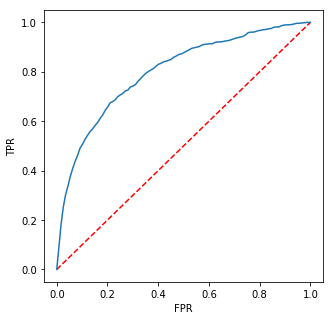

In [47]:
#Make ROC plots 
import matplotlib.pyplot as plt
%matplotlib inline 
plt.figure(figsize=(5,5))
plt.plot([0, 1], [0, 1], 'r--')
plt.plot(lrModel.summary.roc.select('FPR').collect(),
         lrModel.summary.roc.select('TPR').collect())

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()